In [1]:
%cd VideoGameGen/

/teamspace/studios/this_studio/VideoGameGen


In [2]:
from videogamegen.data.dataset import VideoFrameDataset, worker_init_fn
from torch.utils.data import DataLoader

In [3]:
dataset = VideoFrameDataset(
    chunk_store_dir='data/chunkstore',
    selected_longplay_ids=[0]
)

In [4]:
len(dataset)

122413

In [5]:
dataloader = DataLoader(dataset, batch_size=256, num_workers=4, shuffle=True, worker_init_fn=worker_init_fn)

In [6]:
batch = next(iter(dataloader))

Slice: 0.000035s, Decompress: 0.000298s, Reshape: 0.000024s, Total: 0.000361s
Slice: 0.000023s, Decompress: 0.002211s, Reshape: 0.000018s, Total: 0.002255s
Slice: 0.000023s, Decompress: 0.003509s, Reshape: 0.000024s, Total: 0.003557s
Slice: 0.000020s, Decompress: 0.000230s, Reshape: 0.000012s, Total: 0.000265s
Slice: 0.000027s, Decompress: 0.000190s, Reshape: 0.000009s, Total: 0.000230s
Slice: 0.000022s, Decompress: 0.001414s, Reshape: 0.000009s, Total: 0.001448sSlice: 0.000024s, Decompress: 0.000194s, Reshape: 0.000008s, Total: 0.000229s

Slice: 0.000018s, Decompress: 0.000144s, Reshape: 0.000006s, Total: 0.000172sSlice: 0.000014s, Decompress: 0.002886s, Reshape: 0.000008s, Total: 0.002911s

Slice: 0.000012s, Decompress: 0.000168s, Reshape: 0.000005s, Total: 0.000188s
Slice: 0.000013s, Decompress: 0.001150s, Reshape: 0.000006s, Total: 0.001172sSlice: 0.000014s, Decompress: 0.006236s, Reshape: 0.000007s, Total: 0.006259s
Slice: 0.000016s, Decompress: 0.001169s, Reshape: 0.000007s, Tota

In [7]:
batch = next(iter(dataloader))

In [10]:
batch.shape

torch.Size([512, 1, 256, 256])

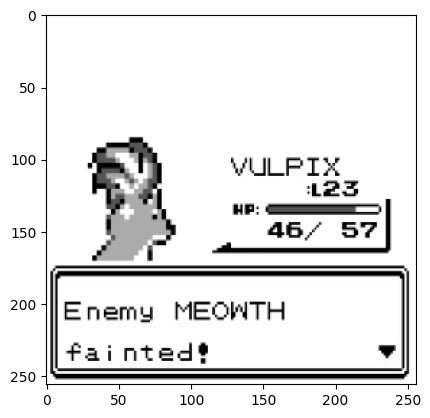

In [22]:
import matplotlib.pyplot as plt
plt.imshow(batch[246].squeeze(0), cmap='gray')

In [12]:
import h5py
def detailed_chunk_info(file_path):
    with h5py.File(file_path, 'r') as f:
        dataset = f['video_frames']
        
        print("Dataset properties:")
        print(f"- Chunks enabled: {dataset.chunks is not None}")
        print(f"- Chunk shape: {dataset.chunks}")
        print(f"- Compression: {dataset.compression}")
        print(f"- Compression opts: {dataset.compression_opts}")

In [13]:
detailed_chunk_info('../gameboyprep/data/longplay_h5_files/238_0.h5')

Dataset properties:
- Chunks enabled: True
- Chunk shape: (1, 256, 256, 1)
- Compression: gzip
- Compression opts: 4


In [ ]:
detailed_chunk_info()